# Run TCLab Experiments

Alex Dowling, University of Notre Dame

## Setup

In [1]:
# Install Pyomo and solvers for Google Colab
import sys
import time

if "google.colab" in sys.modules:
    !wget "https://raw.githubusercontent.com/IDAES/idaes-pse/main/scripts/colab_helper.py"
    import colab_helper

    colab_helper.install_idaes()
    colab_helper.install_ipopt()

# Set plotting defaults
import matplotlib.pyplot as plt

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('lines', linewidth=3)

## Load Control Signal

In [2]:
import pandas as pd

# input_data = pd.read_csv('./data/u_via_GP_of_resid_with_du_penalty.csv')
# input_data = pd.read_csv('./data/solution_benchmark_0o5du1.csv')
# input_data = pd.read_csv('./data/tclab_final_as_of_20240807__u_GP.csv')
# input_data = pd.read_csv('./data/tclab_final_as_of_20240807__u_GP_trained_w_Tset_results_appended.csv')

# input_data.head()

# input_data.plot(x='Time', y='Q1', title='Open-Loop Optimal Control Signal', legend=False)
# plt.show()

In [3]:
import numpy as np

def control_signal(t, period=5*60, amplitude=50, sine=True):
    # return np.interp(t, input_data['Time'], input_data['Q1'])
    if sine:
        return 50 + amplitude*np.sin(2*np.pi/period*t)  # period in seconds
    else:
        return 50

t_plot = np.linspace(0, 1000, 500)

# plt.plot(t_plot, control_signal(t_plot))
# plt.xlabel('Time')
# plt.ylabel('Control Signal')
# plt.show()

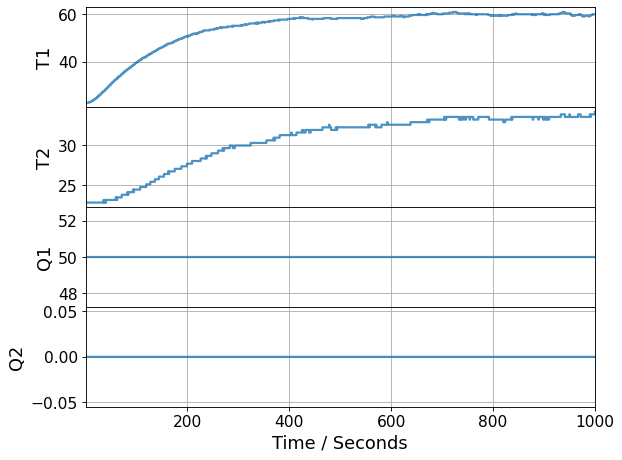

TCLab disconnected successfully.


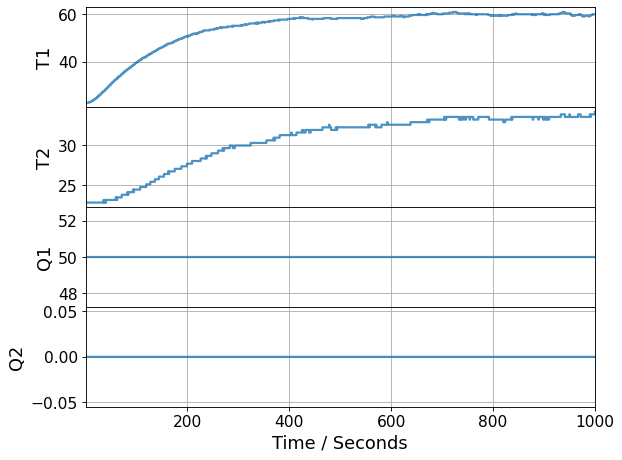

In [12]:
from tclab import TCLab, clock, Historian, Plotter

# experimental parameters
P1 = 200
tfinal = 1000

# perform experiment
with TCLab() as lab:
    lab.P1 = P1
    h = Historian(lab.sources)
    p = Plotter(h, tfinal)
    lab.Q1(control_signal(0))
    for t in clock(tfinal):
        lab.Q1(control_signal(t))
        p.update(t)

In [13]:
experiment_name = '_step_50_run_3'
data_file = '../data/validation_experiment_env_1' + experiment_name + '.csv'
h.to_csv(data_file)

In [7]:
# Function to run the experiment
def run_experiment(tfinal, sine, period, P1=200):
    with TCLab() as lab:
        lab.P1 = P1
        h = Historian(lab.sources)
        p = Plotter(h, tfinal)
        lab.Q1(control_signal(0))
        for t in clock(tfinal):
            lab.Q1(control_signal(t=t, period=period*60, sine=sine))
            p.update(t)
    return h

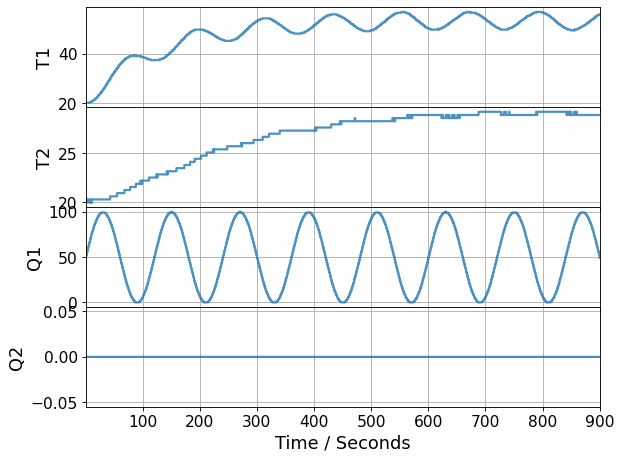

TCLab disconnected successfully.


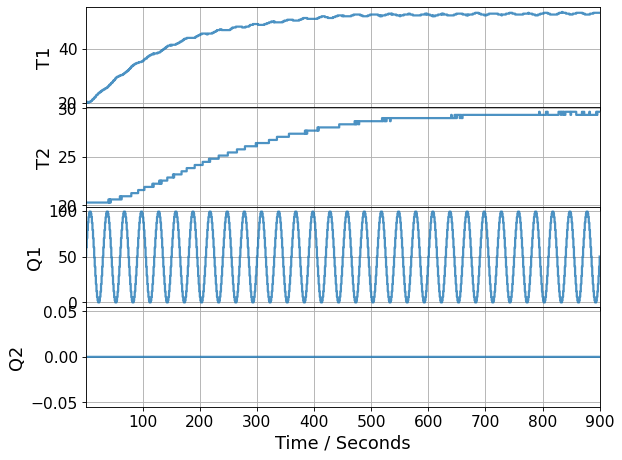

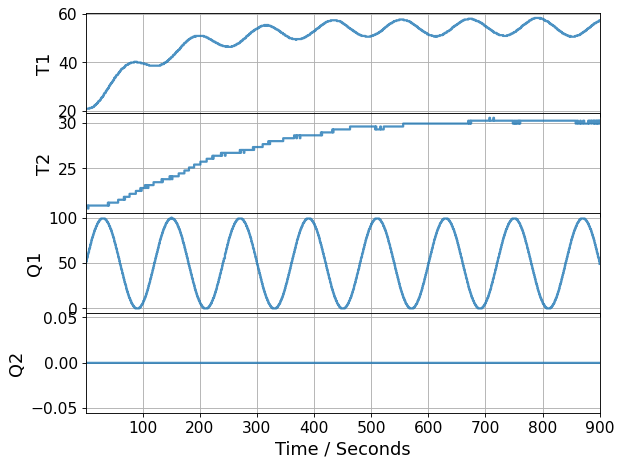

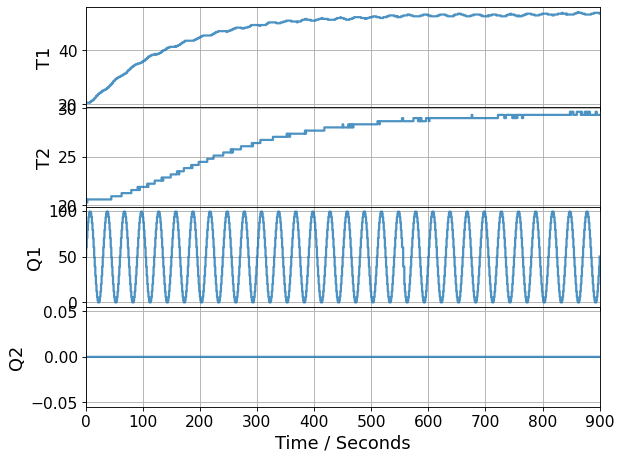

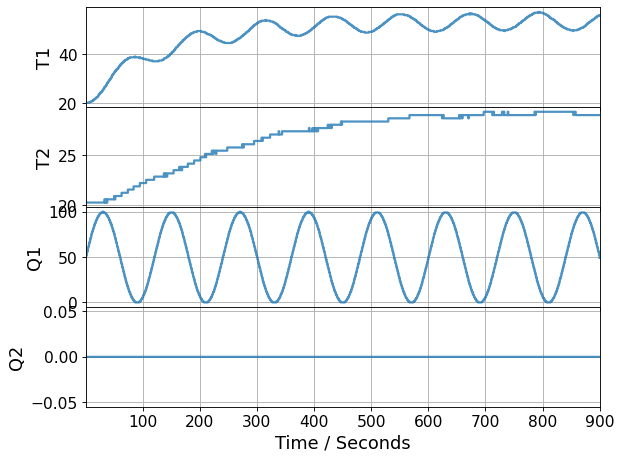

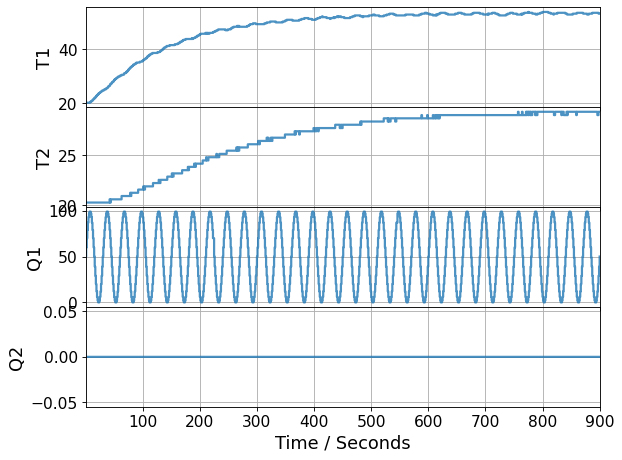

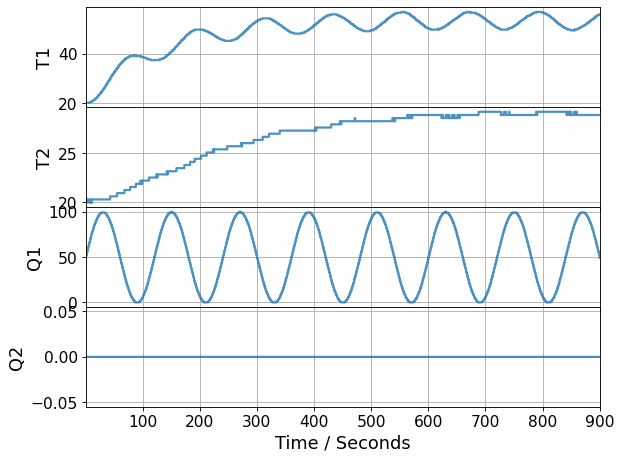

In [9]:
# Running automated experiments
from tclab import TCLab, clock, Historian, Plotter

base_name_sine = '../data/validation_experiment_env_2_sin_{}_50_run_{}.csv'
base_name_step = '../data/validation_experiment_env_2_step_50_run_{}.csv'

tfinal = 900

wait_time = 25 * 60  # 25 minutes to cool down

for i in range(3):
    # for j in [0.5, 1, 2, 3, 4]:
    for j in [0.5, 2]:
        # Run sine wave experiment
        if j == 0.5:
            file_name = base_name_sine.format(50, i + 1)
        else:
            file_name = base_name_sine.format(j, i + 1)
        data = run_experiment(tfinal, True, j)
        data.to_csv(file_name)
        
        # Wait for cooldown
        time.sleep(wait_time)

    # # Run step experiment
    # file_name = base_name_step.format(i + 1)
    # data = run_experiment(tfinal, False)
    # data.to_csv(file_name)

    # # Wait for cooldown
    # time.sleep(wait_time)

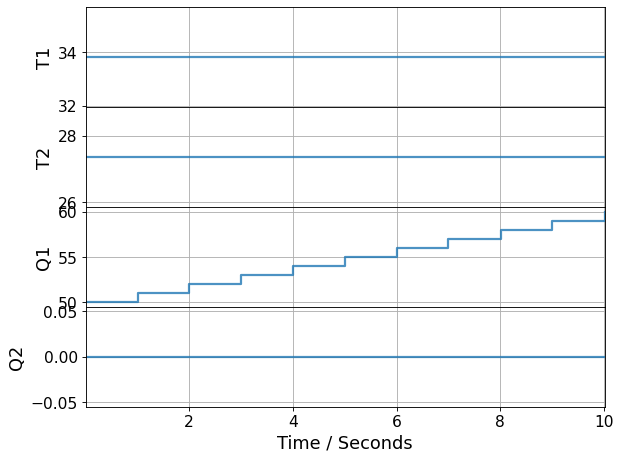

TCLab disconnected successfully.


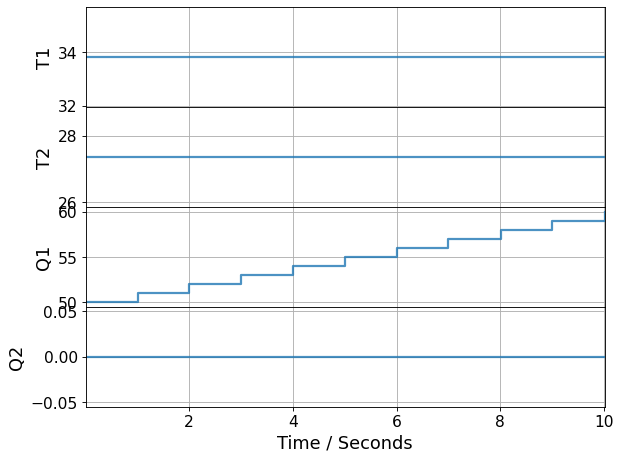

In [10]:
from tclab import TCLab, clock, Historian, Plotter
data = run_experiment(10, True)

print(data)